In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
def fun(x):
    return 3*x**2-4*x+5

In [4]:
fun(3)

20

In [5]:
x = np.arange(-5, 5, 0.25)
y = fun(x)
plt.plot(x,y)


<IPython.core.display.Javascript object>

In [6]:
# lets get derivative of this funtionat some points with formal defination
h=0.0001
x = 3
(fun(x+h)-fun(x))/h

14.000300000063248

In [7]:
h=0.0001
a= 2
b=-3
c=10
d=a*b+c
d1=a*b+c
a+=h
d2=a*b+c
print("d1 : ", d1)
print("d2 : ", d2)
print("slop : ", (d2-d1)/h)
# this equation is useful at quicly undertand, if results are ok
#since this is a lin eequation, so which ever value we are bumping, the clope value should be equal to that

d1 :  4
d2 :  3.999699999999999
slop :  -3.000000000010772


### micrograd class

In [29]:
class Value:
    def __init__(self,data, _children=(), _op = '', label = " "):
        self.data = data
        self.prev = _children
        self._op = _op
        self.label = label
        self.grad = 0.0
    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        return Value(self.data+other.data, (self, other), '+')

    def __mul__(self, other):
        return Value(self.data*other.data, (self, other), '*')
a= Value(5.0, label = "a")
b= Value(3, label = "b")
c= Value(2, label = "c")
d = a*b ; d.label = "d"
e= d+c; e.label="e"
f = Value(-2, label = "f")
L = e*f; L.label = "L"
L

Value(data=-34.0)

{Value(data=-34.0), Value(data=17.0), Value(data=2), Value(data=3), Value(data=5.0), Value(data=15.0), Value(data=-2)}
{(Value(data=5.0), Value(data=15.0)), (Value(data=-2), Value(data=-34.0)), (Value(data=2), Value(data=17.0)), (Value(data=17.0), Value(data=-34.0)), (Value(data=15.0), Value(data=17.0)), (Value(data=3), Value(data=15.0))}
124689898027008
124689898026528
124690296731744
124690296731888
124690296732992
124689898025328
124689898027488


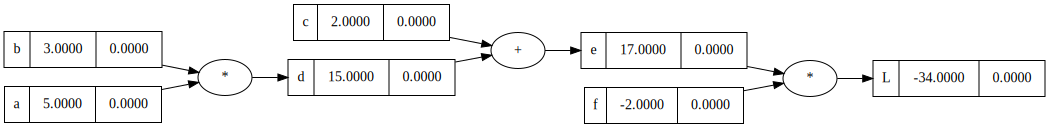

In [31]:
from graphviz import Digraph

def trace(root):
    nodes, edges= set(),set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child  in v.prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes , edges
def draw_dot(root):
    dot = Digraph(format='svg', graph_attr = {'rankdir':'LR'})
    nodes, edges = trace(root)
    print(nodes)
    print(edges)
    for n in nodes:
        uid = str(id(n))
        print(id(n))
        dot.node(name=uid, label = "{ %s | %.4f | %.4f}" % (n.label,n.data,n.grad ), shape = 'record')
        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid+ n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2))+n2._op)

    return dot

draw_dot(L)

Here Anderj explain how the gredint will update when we do back propagation , he shows it by doing it mannualy,
and alalyticly verifies each values
back propagation only changes the value of gredint not the data values.
But i also feel that data  is also weight because he is bumping the values of the data to check change in loss value

in forward pass, values of data is changing but in back propagatiion the value of gradint is changing

Next he shows howa neuron would work , this would give us more clearity